In [1]:
#importing the required libraries
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset
df_card = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df_card.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
21996,21997,160000.0,2,1,2,27,-2,-2,-2,-2,...,372.0,372.0,372.0,1320.0,1276.0,372.0,372.0,372.0,372.0,0
19704,19705,20000.0,2,2,1,31,0,0,0,0,...,0.0,0.0,0.0,3000.0,1000.0,0.0,0.0,0.0,0.0,0
20223,20224,70000.0,2,2,2,52,1,2,0,0,...,43627.0,15251.0,16285.0,0.0,2369.0,5178.0,0.0,1285.0,2308.0,0
28319,28320,50000.0,2,2,2,27,1,2,2,2,...,13440.0,14416.0,14043.0,1500.0,1500.0,0.0,1200.0,0.0,1500.0,0
12575,12576,140000.0,2,1,2,24,0,0,0,0,...,19353.0,8966.0,14300.0,3645.0,2322.0,387.0,1000.0,14300.0,2900.0,0
16813,16814,20000.0,1,1,2,38,0,0,0,0,...,15151.0,16741.0,20540.0,5006.0,4015.0,2006.0,7137.0,18000.0,202.0,1
27743,27744,10000.0,2,1,2,24,0,0,0,0,...,8854.0,9229.0,8376.0,2000.0,2000.0,2000.0,1000.0,1000.0,1000.0,0
25708,25709,50000.0,2,3,1,45,1,2,0,0,...,49586.0,30023.0,28373.0,0.0,3000.0,1500.0,5000.0,2000.0,2000.0,0
7393,7394,100000.0,2,2,1,41,0,0,0,0,...,79519.0,74368.0,58481.0,7000.0,3533.0,2673.0,3500.0,4303.0,3023.0,0
12471,12472,130000.0,1,1,2,30,0,0,2,0,...,127762.0,134010.0,133548.0,12207.0,0.0,5000.0,10100.0,4500.0,0.0,0


In [5]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
#categorical variable description
df_card[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [7]:
# Payment delay description
df_card[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Bill Statement description
df_card[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [9]:
#Previous Payment Description
df_card[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [10]:
df_card.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [11]:
#Renaming 2 columns
df_card = df_card.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
#Dimensions of the dataset
print(df_card.shape)

(30000, 25)


In [13]:
#This shows us that there are 30000 rows and 25 columns

DECISION TREE

In [14]:
#importing libraries for machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [15]:
# create the target variable
y = df_card['def_pay'].copy()
y.sample(5)

24084    0
27299    0
18805    0
8499     0
7442     0
Name: def_pay, dtype: int64

In [16]:
# create the features, which now will be everything in the original df
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df_card[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [17]:
# split the df into train and test, it is important these two do not communicate during the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# this means we will train on 80% of the data and test on the remaining 20%.

In [18]:
#check that the target is not far off
print(df_card.def_pay.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: def_pay, dtype: float64


In [19]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.812

In [20]:
#now taking max_depth as 100 and applying the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7231666666666666

In [70]:
#creating a function that will return variables with their scores
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

 Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

criterion can be gini (measures how often a randomly chosen element would be incorrectly identified) or entropy (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)
max depth is the maximum amount of steps the tree should do
max leaf nodes maximum number of nodes
min sample split a limit to stop further splitting, useful to avoid overfitting

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:

#plotting the histogram for the various columns
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name) #
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

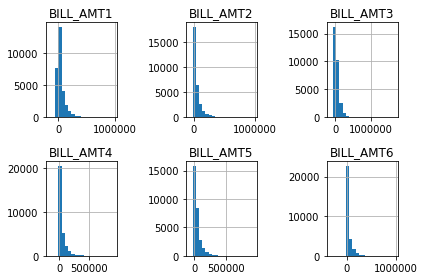

In [23]:
#For the columns with bill statements
bills = df_card[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

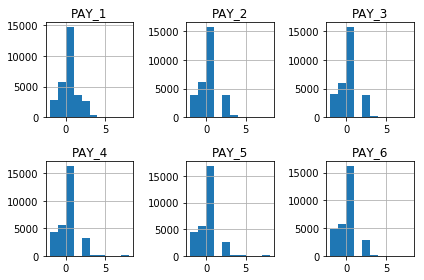

In [24]:
#All columns of repayment status
late = df_card[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

Text(0.5, 1.0, 'AGE Distribution')

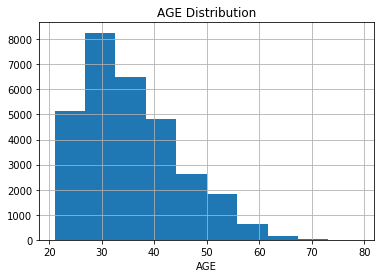

In [86]:
#For age column
df_card.AGE.hist()
plt.xlabel('AGE')
plt.title('AGE Distribution')

Text(0.5, 1.0, 'Card limit Distribution')

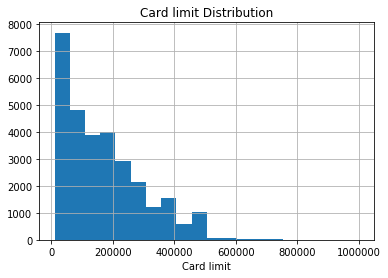

In [87]:
#For card limit column
df_card.LIMIT_BAL.hist(bins = 20)
plt.xlabel('Card limit')
plt.title('Card limit Distribution')

In [27]:
#Data Cleaning
#The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)
fil = (df_card.EDUCATION == 5) | (df_card.EDUCATION == 6) | (df_card.EDUCATION == 0)
df_card.loc[fil, 'EDUCATION'] = 4
df_card.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [28]:
#The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).
df_card.loc[df_card.MARRIAGE == 0, 'MARRIAGE'] = 3
df_card.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

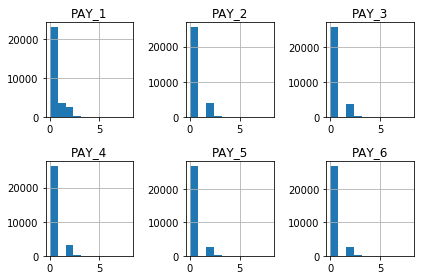

In [29]:
#Cleaning the repayment status columns, taking -1, -2 as 0 which means dues per paid
fil = (df_card.PAY_1 == -2) | (df_card.PAY_1 == -1) | (df_card.PAY_1 == 0)
df_card.loc[fil, 'PAY_1'] = 0
fil = (df_card.PAY_2 == -2) | (df_card.PAY_2 == -1) | (df_card.PAY_2 == 0)
df_card.loc[fil, 'PAY_2'] = 0
fil = (df_card.PAY_3 == -2) | (df_card.PAY_3 == -1) | (df_card.PAY_3 == 0)
df_card.loc[fil, 'PAY_3'] = 0
fil = (df_card.PAY_4 == -2) | (df_card.PAY_4 == -1) | (df_card.PAY_4 == 0)
df_card.loc[fil, 'PAY_4'] = 0
fil = (df_card.PAY_5 == -2) | (df_card.PAY_5 == -1) | (df_card.PAY_5 == 0)
df_card.loc[fil, 'PAY_5'] = 0
fil = (df_card.PAY_6 == -2) | (df_card.PAY_6 == -1) | (df_card.PAY_6 == 0)
df_card.loc[fil, 'PAY_6'] = 0
late = df_card[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)
#There can be seen a huge difference between the values in the columns which suggests that some card owners were extremely rich than the others

In [30]:
#Now we will try to find correlations between the columns
#Correlation between SEX and def_pay
df_card.groupby(['SEX', 'def_pay']).size()

SEX  def_pay
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

In [31]:
#Saving this as a data set
gender = df_card.groupby(['SEX', 'def_pay']).size().unstack(1) #using unstack will print the dataset when gender is called
gender

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


Text(0.5, 1.0, 'Correlation between def_pay and sex')

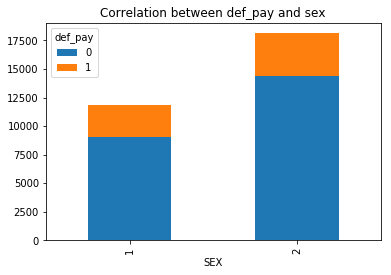

In [88]:
#plotting a graph to get a clearer idea on correlation
gender.plot(kind='bar', stacked = True)#plotting a bar plot
#From this plot we can say that:
#there are significantly more women than men
#men are most likely going to default the next month
plt.title('Correlation between def_pay and sex')

In [33]:
#I am now creating a function which will calculate the numerical correlation between two columns
def correlation_cols(Col1, Col2):
    res = df_card.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [34]:
#Finding correlation between Education and def_pay
correlation_cols('EDUCATION', 'def_pay')
#It seems that the higher is the education, the lower is the probability of defaulting the next month. 

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [35]:
#Finding correlation between Marriage and def_pay
correlation_cols('MARRIAGE', 'def_pay')
#Here we can see that married people are more likely to default payment as also others category.

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


In [36]:
##Finding correlation between Marriage and sex
correlation_cols('MARRIAGE', 'SEX')
#here we can say that 

SEX,1,2,perc
MARRIAGE,,,
1,5190,8469,0.620031
2,6553,9411,0.589514
3,145,232,0.615385


In [37]:
##Finding correlation between Education and sex
correlation_cols('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


#After looking at the processed data and the co realtion, we can say:

#If a customer has a bill of X amount, then he pays Y amount
#I have a BILL of X, I pay Y
#The month after I have to pay X-Y + X', being X' my new expenses, I pay Y'
#The month after I have to pay X+X' - Y - Y' + X'' , I pay Y''

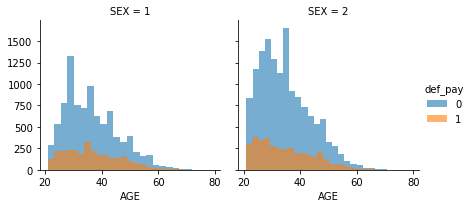

In [39]:
#Lets try some correlations with sex and age
#First i wll plot age with sex and def_pay
sex_plot = sns.FacetGrid(df_card, col='SEX', hue='def_pay')
sex_plot.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
sex_plot.add_legend()
#This shows that for males and females as age increases default payment decreases.
#However here too, we can say that females show a higher value of default at younger age than males

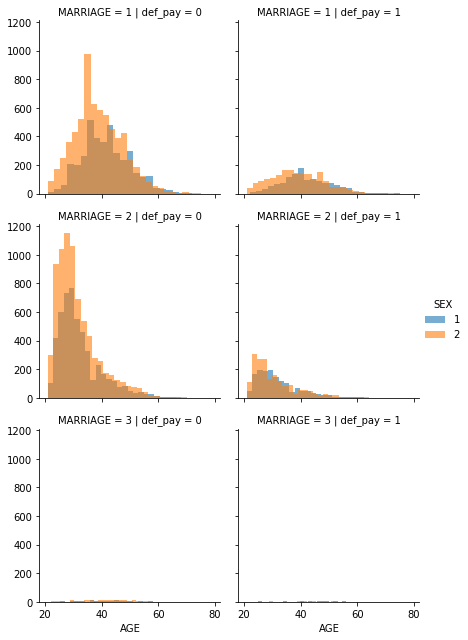

In [40]:
#Here I have ploted sex with marriage and def_pay
marriage_plot = sns.FacetGrid(df_card, col='def_pay', row= "MARRIAGE", hue='SEX')
marriage_plot.map(plt.hist, 'AGE', alpha=0.6, bins=25) 
marriage_plot.add_legend()

From the above plots we can see that age gives more descriptive features with other columns

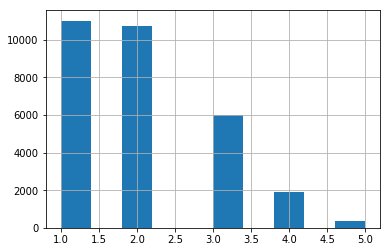

In [41]:
#creating a column called age bin with more defined age values
df_card['AgeBin'] = pd.cut(df_card['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df_card['AgeBin'] = pd.to_numeric(df_card['AgeBin'])
df_card.loc[(df_card['AgeBin'] == 6) , 'AgeBin'] = 5

#plotting the histogram of the ages band
df_card.AgeBin.hist()

In [42]:
#Correlation with new age value with def_pay
correlation_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [43]:
df_card['SE_MA'] = 0
df_card.loc[((df_card.SEX == 1) & (df_card.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
df_card.loc[((df_card.SEX == 1) & (df_card.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
df_card.loc[((df_card.SEX == 1) & (df_card.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
df_card.loc[((df_card.SEX == 2) & (df_card.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
df_card.loc[((df_card.SEX == 2) & (df_card.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
df_card.loc[((df_card.SEX == 2) & (df_card.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
correlation_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


In [44]:
#Correlation with new age value with sex
correlation_cols('AgeBin', 'SEX')
#I see that default probability goes down in your 30's and then goes higher and higher. At the same time, the percentage 
#of men is growing with the age category. Thus I want to combine the two as before and create a combination of the two.

SEX,1,2,perc
AgeBin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


In [47]:
from ggplot import *


In [46]:
from pandas import Timestamp

In [48]:
#Taking into consideration sex and age together in a new column
df_card['SEX_AGE'] = 0
df_card.loc[((df_card.SEX == 1) & (df_card.AgeBin == 1)) , 'SEX_AGE'] = 1 #man in 20's
df_card.loc[((df_card.SEX == 1) & (df_card.AgeBin == 2)) , 'SEX_AGE'] = 2 #man in 30's
df_card.loc[((df_card.SEX == 1) & (df_card.AgeBin == 3)) , 'SEX_AGE'] = 3 #man in 40's
df_card.loc[((df_card.SEX == 1) & (df_card.AgeBin == 4)) , 'SEX_AGE'] = 4 #man in 50's
df_card.loc[((df_card.SEX == 1) & (df_card.AgeBin == 5)) , 'SEX_AGE'] = 5 #man in 60's and above
df_card.loc[((df_card.SEX == 2) & (df_card.AgeBin == 1)) , 'SEX_AGE'] = 6 #woman in 20's
df_card.loc[((df_card.SEX == 2) & (df_card.AgeBin == 2)) , 'SEX_AGE'] = 7 #woman in 30's
df_card.loc[((df_card.SEX == 2) & (df_card.AgeBin == 3)) , 'SEX_AGE'] = 8 #woman in 40's
df_card.loc[((df_card.SEX == 2) & (df_card.AgeBin == 4)) , 'SEX_AGE'] = 9 #woman in 50's
df_card.loc[((df_card.SEX == 2) & (df_card.AgeBin == 5)) , 'SEX_AGE'] = 10 #woman in 60's and above
correlation_cols('SEX_AGE', 'def_pay')

def_pay,0,1,perc
SEX_AGE,,,
1,2929,913,0.237637
2,3350,1013,0.232180
3,1939,648,0.250483
4,666,251,0.273719
5,131,48,0.268156
6,5613,1558,0.217264
7,5174,1176,0.185197
8,2667,751,0.219719
9,783,230,0.227048


In [49]:
#Assigning new columns as O where repayment status, bill statement and amount of previous payment are category 0
df_card['Client_6'] = 1
df_card['Client_5'] = 1
df_card['Client_4'] = 1
df_card['Client_3'] = 1
df_card['Client_2'] = 1
df_card['Client_1'] = 1
df_card.loc[((df_card.PAY_6 == 0) & (df_card.BILL_AMT6 == 0) & (df_card.PAY_AMT6 == 0)) , 'Client_6'] = 0
df_card.loc[((df_card.PAY_5 == 0) & (df_card.BILL_AMT5 == 0) & (df_card.PAY_AMT5 == 0)) , 'Client_5'] = 0
df_card.loc[((df_card.PAY_4 == 0) & (df_card.BILL_AMT4 == 0) & (df_card.PAY_AMT4 == 0)) , 'Client_4'] = 0
df_card.loc[((df_card.PAY_3 == 0) & (df_card.BILL_AMT3 == 0) & (df_card.PAY_AMT3 == 0)) , 'Client_3'] = 0
df_card.loc[((df_card.PAY_2 == 0) & (df_card.BILL_AMT2 == 0) & (df_card.PAY_AMT2 == 0)) , 'Client_2'] = 0
df_card.loc[((df_card.PAY_1 == 0) & (df_card.BILL_AMT1 == 0) & (df_card.PAY_AMT1 == 0)) , 'Client_1'] = 0

#Now calculating their counts 

pd.Series([df_card[df_card.Client_6 == 1].def_pay.count(),
          df_card[df_card.Client_5 == 1].def_pay.count(),
          df_card[df_card.Client_4 == 1].def_pay.count(),
          df_card[df_card.Client_3 == 1].def_pay.count(),
          df_card[df_card.Client_2 == 1].def_pay.count(),
          df_card[df_card.Client_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    26700
5    27247
4    27572
3    27810
2    28183
1    29477
dtype: int64

In [50]:
#Creating separate columns for average expenses
df_card['Avg_exp_5'] = ((df_card['BILL_AMT5'] - (df_card['BILL_AMT6'] - df_card['PAY_AMT5']))) / df_card['LIMIT_BAL']
df_card['Avg_exp_4'] = (((df_card['BILL_AMT5'] - (df_card['BILL_AMT6'] - df_card['PAY_AMT5'])) +
                 (df_card['BILL_AMT4'] - (df_card['BILL_AMT5'] - df_card['PAY_AMT4']))) / 2) / df_card['LIMIT_BAL']
df_card['Avg_exp_3'] = (((df_card['BILL_AMT5'] - (df_card['BILL_AMT6'] - df_card['PAY_AMT5'])) +
                 (df_card['BILL_AMT4'] - (df_card['BILL_AMT5'] - df_card['PAY_AMT4'])) +
                 (df_card['BILL_AMT3'] - (df_card['BILL_AMT4'] - df_card['PAY_AMT3']))) / 3) / df_card['LIMIT_BAL']
df_card['Avg_exp_2'] = (((df_card['BILL_AMT5'] - (df_card['BILL_AMT6'] - df_card['PAY_AMT5'])) +
                 (df_card['BILL_AMT4'] - (df_card['BILL_AMT5'] - df_card['PAY_AMT4'])) +
                 (df_card['BILL_AMT3'] - (df_card['BILL_AMT4'] - df_card['PAY_AMT3'])) +
                 (df_card['BILL_AMT2'] - (df_card['BILL_AMT3'] - df_card['PAY_AMT2']))) / 4) / df_card['LIMIT_BAL']
df_card['Avg_exp_1'] = (((df_card['BILL_AMT5'] - (df_card['BILL_AMT6'] - df_card['PAY_AMT5'])) +
                 (df_card['BILL_AMT4'] - (df_card['BILL_AMT5'] - df_card['PAY_AMT4'])) +
                 (df_card['BILL_AMT3'] - (df_card['BILL_AMT4'] - df_card['PAY_AMT3'])) +
                 (df_card['BILL_AMT2'] - (df_card['BILL_AMT3'] - df_card['PAY_AMT2'])) +
                 (df_card['BILL_AMT1'] - (df_card['BILL_AMT2'] - df_card['PAY_AMT1']))) / 5) / df_card['LIMIT_BAL']
df_card[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'def_pay']].sample(20)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,def_pay
20038,500000.0,0.068116,33958.0,0.115051,112222.0,0.148789,214481.0,0.146858,274198.0,0.211269,494140.0,0
3076,50000.0,0.000740,1976.0,0.000370,976.0,0.000247,956.0,0.222435,44450.0,0.202440,48423.0,1
15505,50000.0,0.008440,28661.0,0.217990,49038.0,0.154080,50351.0,0.119330,46415.0,0.099720,47479.0,0
28272,20000.0,0.971750,19422.0,0.490875,19064.0,0.353750,18354.0,0.292712,-885.0,0.234370,-885.0,0
24747,210000.0,0.001548,325.0,0.001548,325.0,0.001548,325.0,0.001935,650.0,0.001548,0.0,1
16441,300000.0,0.000000,517.0,0.000440,264.0,0.000587,264.0,0.000660,264.0,0.000704,528.0,0
22805,30000.0,0.107800,8314.0,0.104700,3048.0,0.089767,4845.0,0.080967,3434.0,0.076807,5239.0,1
7127,500000.0,0.080576,40018.0,0.049874,49403.0,0.065292,48017.0,0.098040,97882.0,0.092214,33179.0,0
14336,380000.0,0.009095,84832.0,0.008962,84687.0,0.007199,82583.0,0.006284,80828.0,0.005696,79099.0,0
246,250000.0,0.022288,5572.0,0.013164,1010.0,0.010824,1536.0,0.009749,1631.0,0.050098,52874.0,0


In [51]:
#Calculating and storing in different columns how far the bill is from the limit
df_card['Closeness_6'] = (df_card.LIMIT_BAL - df_card.BILL_AMT6) / df_card.LIMIT_BAL
df_card['Closeness_5'] = (df_card.LIMIT_BAL - df_card.BILL_AMT5) / df_card.LIMIT_BAL
df_card['Closeness_4'] = (df_card.LIMIT_BAL - df_card.BILL_AMT4) / df_card.LIMIT_BAL
df_card['Closeness_3'] = (df_card.LIMIT_BAL - df_card.BILL_AMT3) / df_card.LIMIT_BAL
df_card['Closeness_2'] = (df_card.LIMIT_BAL - df_card.BILL_AMT2) / df_card.LIMIT_BAL
df_card['Closeness_1'] = (df_card.LIMIT_BAL - df_card.BILL_AMT1) / df_card.LIMIT_BAL
df_card[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'def_pay']].sample(20)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
26020,0.982938,0.996438,0.983469,0.996746,0.977877,0.992854,0
17997,1.000128,0.955928,1.000008,0.939808,0.993656,0.975081,0
15830,0.986708,0.960250,0.879667,0.808192,0.681217,0.521258,0
2804,0.993033,0.994283,0.988567,0.994283,0.994283,0.994283,0
16090,0.992675,0.995150,0.997625,0.992675,0.995150,0.995150,0
13645,0.527596,0.509800,0.494696,0.492648,0.415896,0.376761,0
23660,1.000000,0.993790,0.977135,1.000000,0.980970,0.992490,0
19412,0.288417,0.331517,0.315550,0.299583,0.436883,0.489317,0
4199,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
11709,0.935119,0.983738,0.996563,0.988394,0.903663,1.000913,0


MACHINE LEARNING MODELS

In [52]:
###Selecting features

#the PAY_n feature is not included as we do not understand the data from its descriptive chart. I will use AgeBin 
#rather than AGE, I will not include SEX because the small correlation do not make sense to me and I have created 
#two categories that include SEX.

features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'SEX_AGE', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = df_card['def_pay'].copy() # target
X = df_card[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #test size is 20% and train is 80%


In [53]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
12746,80000.0,3,1,0,0,0,0,0,0,46802.0,...,0.010206,0.042046,0.037381,0.068275,0.623537,0.632188,0.588963,0.583037,0.414975,0
17275,90000.0,1,2,0,0,0,0,0,0,1560.0,...,0.033117,0.025170,0.129192,0.106820,0.991822,0.941944,0.990722,0.742744,0.982667,0
17641,140000.0,2,1,0,0,0,0,0,0,127794.0,...,0.043275,0.052076,0.054343,0.059676,0.233114,0.199607,0.168579,0.137357,0.087186,0
11492,320000.0,2,1,0,0,0,0,0,0,188106.0,...,0.029430,0.031933,0.028944,0.033489,0.487400,0.461875,0.443694,0.443541,0.412169,0
26311,210000.0,2,2,0,0,0,0,0,0,0.0,...,0.003755,0.002503,0.001877,0.001502,1.000000,0.992490,1.000000,1.000000,1.000000,0
19112,140000.0,1,2,0,0,0,0,0,0,1756.0,...,0.008300,0.007731,0.009729,0.010303,0.995907,0.987493,0.993407,0.984279,0.987457,0
4218,150000.0,1,1,0,0,0,0,0,0,2565.0,...,0.029640,0.019760,0.020900,0.020140,0.975520,0.962760,0.962760,0.975680,0.982900,0
26514,20000.0,2,2,0,0,0,0,0,0,16503.0,...,0.012875,0.079350,0.063125,0.053300,0.203100,0.225250,0.075950,0.124400,0.174850,0
28186,150000.0,1,1,0,0,0,0,0,0,20441.0,...,0.024883,0.019078,0.058345,0.047440,0.989887,0.960447,0.992727,0.823887,0.863727,0
25646,430000.0,1,2,0,0,0,0,0,0,41092.0,...,0.002264,0.002319,0.002148,0.002182,0.888642,0.893842,0.896065,0.899779,0.904437,0


In [54]:
from sklearn.utils import resample

In [55]:
# Separate majority and minority classes
df_majority = df_train[df_train.def_pay==0]
df_minority = df_train[df_train.def_pay==1]

print(df_majority.def_pay.count())
print("-----------")
print(df_minority.def_pay.count())
print("-----------")
print(df_train.def_pay.value_counts())

18677
-----------
5323
-----------
0    18677
1     5323
Name: def_pay, dtype: int64


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score

In [59]:
# classifier list for the normal training set
clf_list = [DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"), 
            RandomForestClassifier(n_estimators = 100, class_weight = "balanced"), 
            AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"),
                               n_estimators = 100), 
            GradientBoostingClassifier(), 
            
           ]
# the parameters are set in order to have the same kind of tree every time

In [62]:
# use Kfold to evaluate the normal training set
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=42,shuffle=True)
mdl = []
fold = []
scr = []
for i,(train_index, test_index) in enumerate(kf.split(df_train)):
    training = df_card.iloc[train_index,:]
    valid = df_card.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[features] #defined above
        label = training['def_pay']
        valid_feats = valid[features]
        valid_label = valid['def_pay']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)

0
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
1
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
2
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
3
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
4
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

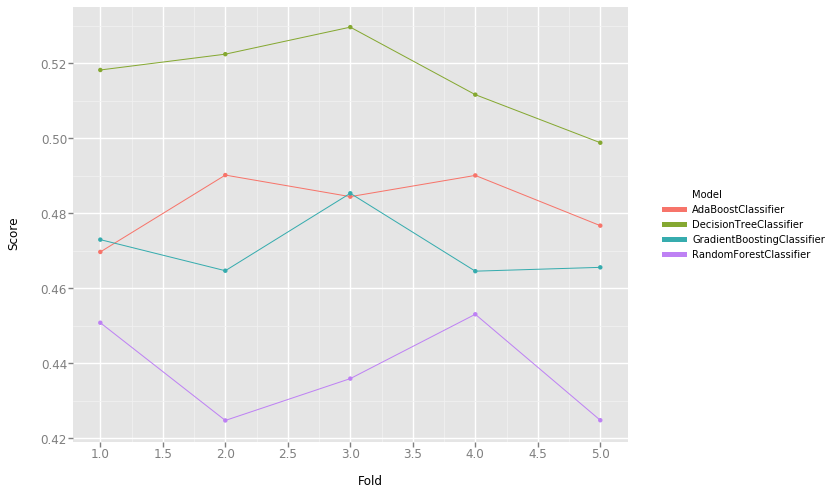

<ggplot: (165866883809)>


In [63]:
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_normal = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_normal)

In [64]:
########### Random forest
# normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

Wall time: 13min 58s
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.45821922327258074


In [65]:
y_upsampled = df_upsampled.def_pay
X_upsampled = df_upsampled.drop(['def_pay'], axis= 1)

In [66]:
################## Ada Boost Classifier
# normal training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight = "balanced")), 
                        param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_normal = grid_ada.best_estimator_

0.408435692436


In [67]:
################ Gradient Booast Classifier
# normal training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(X_train, y_train)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_normal = grid_gbc.best_estimator_

0.443888650557


In [ ]:
#TRAINING AND TESTING

In [71]:
####Random Forest
# Normal sample training
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

Wall time: 49.8 s
-------------
f1 score: 0.452
Accuracy: 0.814
-------------
           feat     score
3         PAY_1  0.067418
0     LIMIT_BAL  0.043855
33  Closeness_1  0.040289
28    Avg_exp_1  0.039999
32  Closeness_2  0.037763
9     BILL_AMT1  0.037567
15     PAY_AMT1  0.035840
27    Avg_exp_2  0.035303
31  Closeness_3  0.035199
16     PAY_AMT2  0.034277
26    Avg_exp_3  0.033091
30  Closeness_4  0.032946
29  Closeness_5  0.032814
20     PAY_AMT6  0.032327
10    BILL_AMT2  0.032315
25    Avg_exp_4  0.032277
17     PAY_AMT3  0.032229
24    Avg_exp_5  0.031658
14    BILL_AMT6  0.031167
11    BILL_AMT3  0.030778
18     PAY_AMT4  0.029928
12    BILL_AMT4  0.029858
4         PAY_2  0.029833
19     PAY_AMT5  0.029736
13    BILL_AMT5  0.029633
23      SEX_AGE  0.020022
5         PAY_3  0.017456
1     EDUCATION  0.015177
6         PAY_4  0.014781
21        SE_MA  0.014029
22       AgeBin  0.014005
7         PAY_5  0.010300
8         PAY_6  0.008704
2      MARRIAGE  0.007426
------------

In [72]:
####### Ada Boost
# Normal sample training
%time ada_normal.fit(X_train, y_train)
predictions = ada_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(ada_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

Wall time: 1min 9s
-------------
f1 score: 0.395
Accuracy: 0.778
-------------
           feat     score
3         PAY_1  0.155262
0     LIMIT_BAL  0.062859
28    Avg_exp_1  0.050294
15     PAY_AMT1  0.038674
33  Closeness_1  0.038449
32  Closeness_2  0.034184
24    Avg_exp_5  0.033798
16     PAY_AMT2  0.033283
17     PAY_AMT3  0.032363
20     PAY_AMT6  0.032161
25    Avg_exp_4  0.031182
9     BILL_AMT1  0.028355
31  Closeness_3  0.028193
27    Avg_exp_2  0.027306
23      SEX_AGE  0.027304
19     PAY_AMT5  0.026870
26    Avg_exp_3  0.026463
30  Closeness_4  0.026444
18     PAY_AMT4  0.025349
29  Closeness_5  0.025185
4         PAY_2  0.024563
14    BILL_AMT6  0.023842
1     EDUCATION  0.022860
10    BILL_AMT2  0.022788
12    BILL_AMT4  0.020217
11    BILL_AMT3  0.019930
13    BILL_AMT5  0.018395
22       AgeBin  0.016474
21        SE_MA  0.015300
6         PAY_4  0.009243
5         PAY_3  0.007365
2      MARRIAGE  0.007009
8         PAY_6  0.005273
7         PAY_5  0.002762
-----------

In [73]:
# Normal sample training
%time gbc_normal.fit(X_train, y_train)
predictions = gbc_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(gbc_normal, features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

Wall time: 19.9 s
-------------
f1 score: 0.474
Accuracy: 0.812
-------------
           feat     score
3         PAY_1  0.370894
4         PAY_2  0.062227
28    Avg_exp_1  0.044349
17     PAY_AMT3  0.034888
32  Closeness_2  0.029248
0     LIMIT_BAL  0.027914
9     BILL_AMT1  0.026559
33  Closeness_1  0.026526
29  Closeness_5  0.026032
24    Avg_exp_5  0.022879
16     PAY_AMT2  0.019294
30  Closeness_4  0.018706
7         PAY_5  0.018647
31  Closeness_3  0.018237
15     PAY_AMT1  0.018122
18     PAY_AMT4  0.018113
26    Avg_exp_3  0.018094
25    Avg_exp_4  0.018081
11    BILL_AMT3  0.017168
27    Avg_exp_2  0.016838
10    BILL_AMT2  0.016192
14    BILL_AMT6  0.015431
6         PAY_4  0.014736
20     PAY_AMT6  0.014526
5         PAY_3  0.013817
19     PAY_AMT5  0.012890
13    BILL_AMT5  0.012809
12    BILL_AMT4  0.012374
8         PAY_6  0.008106
1     EDUCATION  0.006832
21        SE_MA  0.006781
22       AgeBin  0.004752
23      SEX_AGE  0.004535
2      MARRIAGE  0.003405
------------

Text(0.5, 1.0, 'Marriage column frequency')

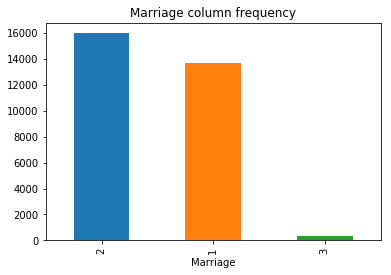

In [84]:
#following data is written for colorful descriptive charts
df_card.MARRIAGE.value_counts().plot(kind = 'bar')
plt.xlabel('Marriage')
plt.title('Marriage column frequency')

Text(0.5, 1.0, 'Education column frequency')

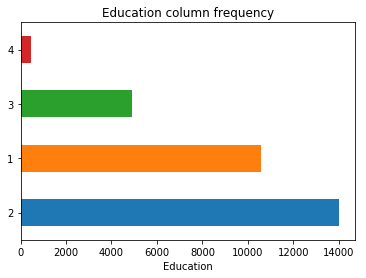

In [85]:
df_card.EDUCATION.value_counts().plot(kind = "barh")
plt.xlabel('Education')
plt.title('Education column frequency')

In [92]:
df_card[['Avg_exp_4', 'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2', 'Closeness_1']].describe()

,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.055519,0.060669,0.061369,0.060640,0.681415,0.666892,0.640497,0.607808,0.588872,0.576229
std,0.103105,0.093521,0.085105,0.077868,0.345301,0.350542,0.368686,0.396449,0.404555,0.411462
min,-0.660550,-0.429867,-0.271525,-0.213730,-2.885550,-3.935500,-4.146850,-9.688575,-5.380500,-5.455300
25%,0.005984,0.007759,0.009250,0.010437,0.417831,0.397755,0.332063,0.244893,0.193500,0.170157
50%,0.018644,0.023749,0.027775,0.030675,0.814776,0.787974,0.757934,0.726865,0.703942,0.686006
75%,0.054061,0.074291,0.083043,0.086425,0.992200,0.988867,0.985701,0.983970,0.981682,0.977968
max,2.472750,3.568125,3.204891,2.684365,2.509530,1.876743,2.374500,2.025100,2.395540,1.619892


In [93]:
df_card.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,...,0.055519,0.060669,0.061369,0.060640,0.681415,0.666892,0.640497,0.607808,0.588872,0.576229
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,...,0.103105,0.093521,0.085105,0.077868,0.345301,0.350542,0.368686,0.396449,0.404555,0.411462
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-0.660550,-0.429867,-0.271525,-0.213730,-2.885550,-3.935500,-4.146850,-9.688575,-5.380500,-5.455300
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,0.005984,0.007759,0.009250,0.010437,0.417831,0.397755,0.332063,0.244893,0.193500,0.170157
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,0.018644,0.023749,0.027775,0.030675,0.814776,0.787974,0.757934,0.726865,0.703942,0.686006
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.054061,0.074291,0.083043,0.086425,0.992200,0.988867,0.985701,0.983970,0.981682,0.977968
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,2.472750,3.568125,3.204891,2.684365,2.509530,1.876743,2.374500,2.025100,2.395540,1.619892
